In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
# 生成数据
# y = 0.05 + 求和0.01x + 干扰
n_train,n_test,num_inputs,batch_size = 20,100,200,5
true_w,ture_b = torch.ones((num_inputs,1)) * 0.01 , 0.05
train_data = d2l.synthetic_data(true_w,ture_b,n_train)
train_iter = d2l.load_array(train_data,batch_size)
test_data  = d2l.synthetic_data(true_w,ture_b,n_test)
test_iter = d2l.load_array(test_data,batch_size,is_train=False)


In [3]:
def init_parmams():
    w = torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b = torch.zeros(1,requires_grad=True)
    return [w,b]



In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [5]:
def train(lambd):
    w,b = init_parmams()
    net,loss = lambda X: d2l.linreg(X,w,b),d2l.squared_loss
    epochs,lr = 100,0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, epochs], legend=['train', 'test'])
    for epoch in range(epochs):
        for x,y in train_iter:
            l = loss(net(x),y) + lambd*l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss))) 
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 13.529966354370117


torch.optim.sgd.SGD

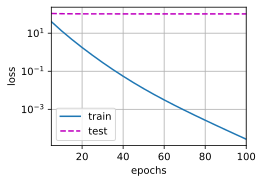

In [6]:
train(lambd=0)
torch.optim.SGD

w的L2范数是： 0.3253971040248871


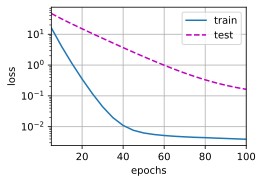

In [7]:
train(lambd=3)

w的L2范数是： 0.02256421558558941


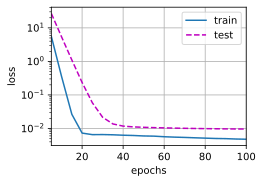

In [8]:
train(lambd=13)

w的L2范数是： 0.37310591340065


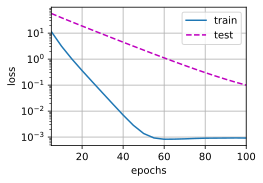

In [9]:
train(lambd=3) # 设置为l1正则项

In [12]:
# 简洁实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([{"params":net[0].weight,"weight_decay":wd},{"params":net[0].bias}],lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.23282527923584


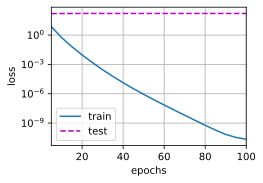

In [13]:
train_concise(0)

w的L2范数： 0.3610118329524994


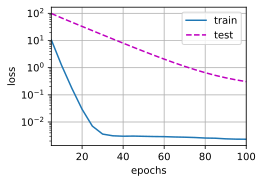

In [14]:
train_concise(3)

w的L2范数： 0.06246783584356308


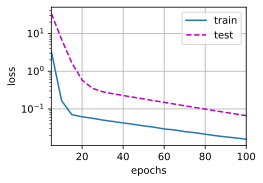

In [15]:
train_concise(13)